<a href="https://colab.research.google.com/github/Priyo-prog/Complete-Feature-Engineering/blob/master/Missing%20Data%20Imputation/missing_data_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Missing Data Imputation**

## **Using Pandas**

In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Mount the google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Create the filename
filename = "/content/drive/MyDrive/Data Science/Feature Selection/houseprice.csv"

In [4]:
data = pd.read_csv(filename)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Columns to use
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice"
]

In [7]:
df = data[cols_to_use]
df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65.0,196.0,2003.0,208500
1,6,1262,1262,1262,298,284,80.0,0.0,1976.0,181500
2,7,920,920,1786,0,434,68.0,162.0,2001.0,223500
3,7,756,961,1717,0,540,60.0,0.0,1998.0,140000
4,8,1145,1145,2198,192,490,84.0,350.0,2000.0,250000


In [8]:
# Separate the data in features and labels
X = df.drop(labels=["SalePrice"], axis=1)
y = df["SalePrice"]

In [9]:
# Separate the data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [10]:
# Find the missing data
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

In [11]:
# Capture the variable to impute in a list
vars_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]
vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

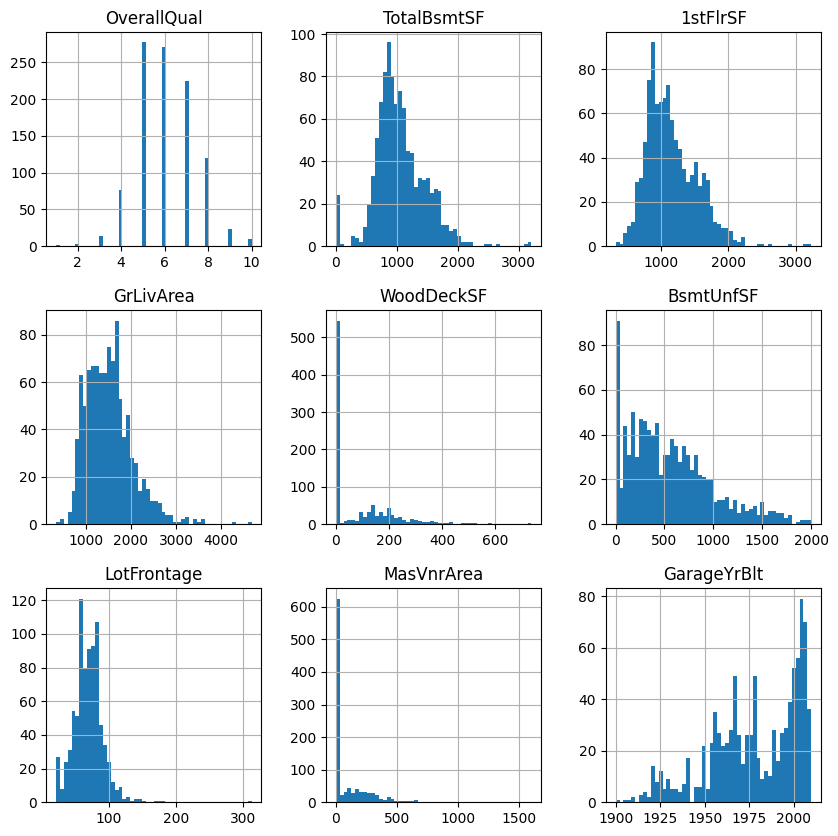

In [12]:
# Let's plot the distributions of the variables
X_train.hist(bins=50, figsize=(10,10))
plt.show()

The above distribution shows that the data are not normally distributed. Therefore we cannot take the **mean** of the data to replace and impute the missing data. So we are left with choice to replace withe **median** of the data

In [13]:
# Capture the median of the 3 variables in a dictionary

imputation_dict = X_train[vars_to_impute].median().to_dict()
imputation_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1979.0}

In [14]:
# Now replace the missing data of the 3 variables with the medians
# of the variables
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [15]:
# Check if any more missing data left
X_train.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [16]:
X_test.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

## **Arbitrary Value Imputation**

In [17]:
# Again split the value in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [18]:
# Check the variables with missing values
X_train.isnull().sum()

OverallQual      0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
WoodDeckSF       0
BsmtUnfSF        0
LotFrontage    189
MasVnrArea       5
GarageYrBlt     54
dtype: int64

In [19]:
# Capture the variables to impute in a list
vars_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]
vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

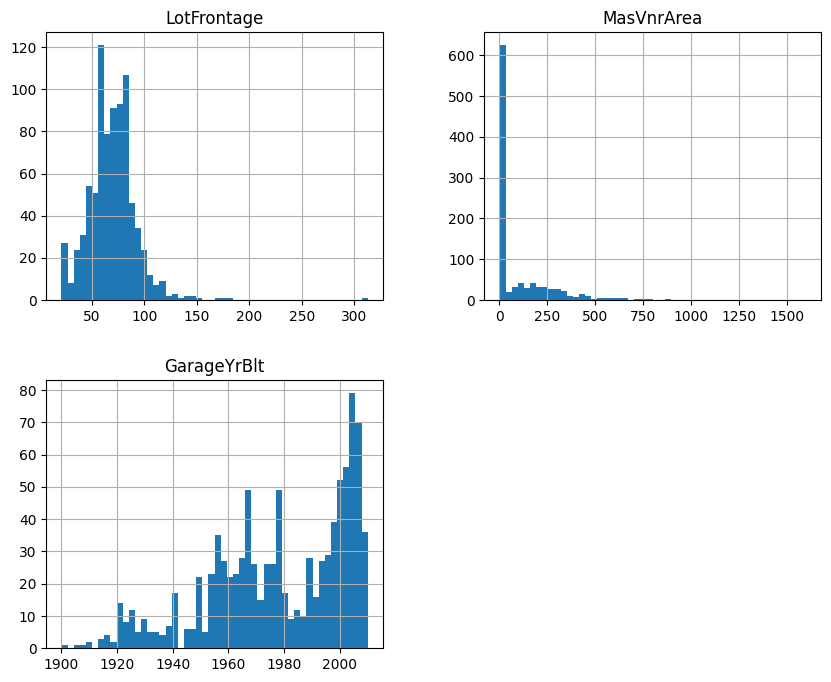

In [20]:
# Let's plot the distributions of these variables
X_train[vars_to_impute].hist(bins=50, figsize=(10,8))
plt.show()

Now I want to see the min and max aggregate of the variables. To fill the missing values with arbitrary numbers mean to fill with values like **999**, **1999**, **2999** etc.

In [21]:
X_train[vars_to_impute].agg(["min", "max"])

,LotFrontage,MasVnrArea,GarageYrBlt
min,21.0,0.0,1900.0
max,313.0,1600.0,2010.0


In [22]:
# Capture the imputation values in a dictionary
imputation_dict = {
    "LotFrontage": 999,
    "MasVnrArea": 1999,
    "GarageYrBlt": 2999
}
imputation_dict

{'LotFrontage': 999, 'MasVnrArea': 1999, 'GarageYrBlt': 2999}

In [23]:
# Replace the missing data
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [24]:
X_train.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

## **Frequent Category Imputation**

This imputation is about missing categorical data

In [25]:
# Two categorical columns and the target sales price
cat_to_use = ["BsmtQual", "FireplaceQu", "SalePrice"]

In [26]:
df_cat = data[cat_to_use]
df_cat.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [28]:
# Create the features and labels
X = df_cat.drop(labels=["SalePrice"], axis=1)
y = df_cat["SalePrice"]

In [29]:
# Separate the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [30]:
# Find the missing data
X_train.isnull().sum()

BsmtQual        24
FireplaceQu    478
dtype: int64

In [31]:
# Calculate the mode
X_train[["BsmtQual", "FireplaceQu"]].mode()

,BsmtQual,FireplaceQu
0,TA,Gd


Some categories may have more than one mode. In this case, we need to decide which category to use as replacement for the NaN values

In [32]:
# Capture the mode of the variable sin a dictionary

imputation_dict = X_train[["BsmtQual", "FireplaceQu"]].mode().iloc[0].to_dict()
imputation_dict

{'BsmtQual': 'TA', 'FireplaceQu': 'Gd'}

In [33]:
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

## **Arbitraty String Imputation**

In [34]:
# Separate the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [35]:
# Find the missing data
X_train.isnull().sum()

BsmtQual        24
FireplaceQu    478
dtype: int64

In [36]:
# Capture Imputation data in a dictionary
imputation_dict = {
    "BsmtQual": "Missing",
    "FireplaceQu": "Missing"
}
imputation_dict

{'BsmtQual': 'Missing', 'FireplaceQu': 'Missing'}

In [37]:
# Simply replace the dictionary in place of missing data
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)
X_train.isnull().sum()

BsmtQual       0
FireplaceQu    0
dtype: int64

## **Missing Indicators**

In [40]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
mix_cols = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "BsmtQual",
    "FireplaceQu",
    "SalePrice"
  ]

In [42]:
# Create Feature and labels
df_final = data[mix_cols]
df_final.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual,FireplaceQu,SalePrice
0,7,856,856,1710,0,150,65.0,196.0,2003.0,Gd,NaN,208500
1,6,1262,1262,1262,298,284,80.0,0.0,1976.0,Gd,TA,181500
2,7,920,920,1786,0,434,68.0,162.0,2001.0,Gd,TA,223500
3,7,756,961,1717,0,540,60.0,0.0,1998.0,TA,Gd,140000
4,8,1145,1145,2198,192,490,84.0,350.0,2000.0,Gd,TA,250000


In [43]:
# Create Features and labels
X = df_final.drop(labels=["SalePrice"], axis=1)
y = df_final["SalePrice"]

In [44]:
# Create training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 11), (438, 11))

In [46]:
# Capture numerical variables
vars_num = list(X_train.select_dtypes(include="number").columns)
vars_num

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [47]:
# Capture categorical variables
vars_cat = list(X_train.select_dtypes(exclude="number").columns)
vars_cat

['BsmtQual', 'FireplaceQu']

In [48]:
# Create the imputation dictionary

# median imputation for numeric
imputation_dict = X_train[vars_num].median().to_dict()

# add mode imputation for categoric
imputation_dict.update(X_train[vars_cat].mode().iloc[0].to_dict())

# show the final imputation dictinary
imputation_dict

{'OverallQual': 6.0,
 'TotalBsmtSF': 992.0,
 '1stFlrSF': 1095.0,
 'GrLivArea': 1479.0,
 'WoodDeckSF': 0.0,
 'BsmtUnfSF': 486.5,
 'LotFrontage': 69.0,
 'MasVnrArea': 0.0,
 'GarageYrBlt': 1979.0,
 'BsmtQual': 'TA',
 'FireplaceQu': 'Gd'}